# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=1500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([1500, 2])

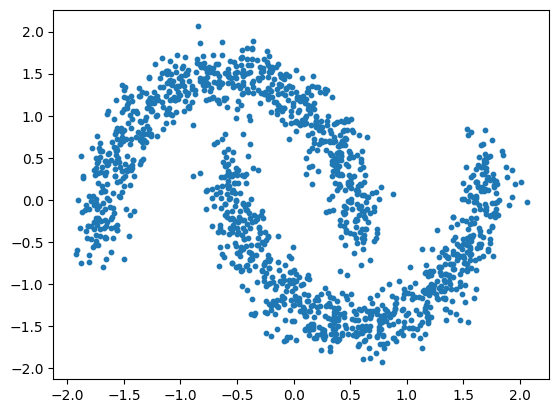

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [16]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=20, grid_resolution=5, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 205 | Loss: 1.8959:  41%|████      | 204/500 [04:36<06:41,  1.36s/it]


Early stopping at epoch 205


Calculating Distances: 100%|██████████| 1861/1861 [00:06<00:00, 309.23it/s]


Henze-Zirkler p-value:	2.2875901918476495e-05


2.2875901918476495e-05

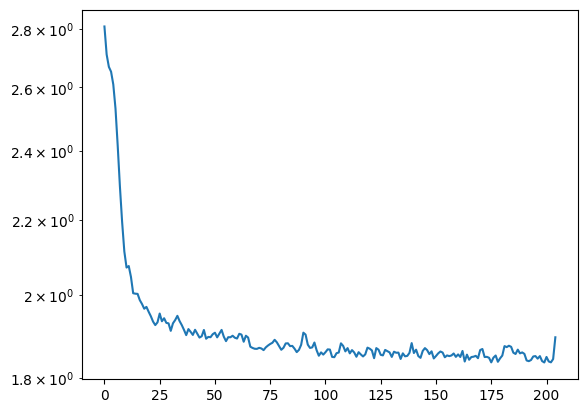

In [17]:
plt.plot(LAM.loss_history)
plt.yscale('log')

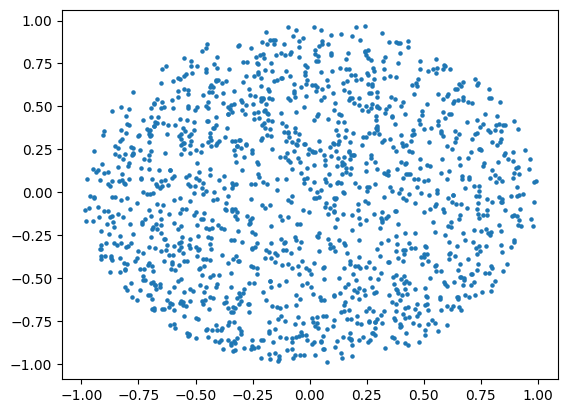

In [18]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [19]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,   43,  128,  339, 1031,  354, 1142,   54, 1348,   80, 1013,
          907, 1190,   33,  392, 1279, 1331,  563,   92, 1270], dtype=int64)],
 [array([0.        , 0.0076637 , 0.01269913, 0.02141406, 0.03086245,
         0.0372027 , 0.04331189, 0.0478713 , 0.053003  , 0.05810891,
         0.06216467, 0.06385026, 0.06653712, 0.0728885 , 0.07349848,
         0.07422944, 0.08399126, 0.09016879, 0.09617512, 0.09766804])])

In [20]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0,   43,  128,  339, 1031], dtype=int64),
  array([   2,  733,  685, 1003,  366], dtype=int64),
  array([   5,  655, 1328,  161,    6], dtype=int64)],
 [array([0.        , 0.0076637 , 0.01269913, 0.02141406, 0.03086245]),
  array([0.        , 0.0103729 , 0.02030907, 0.02327547, 0.0254265 ]),
  array([0.        , 0.00579883, 0.02795453, 0.04158251, 0.05148018])])

In [21]:
# calculate the distance between the points 0 and p
p = 5
dist = LAM.distance(0, p, return_path=False)
print(dist)

[0.57187441]


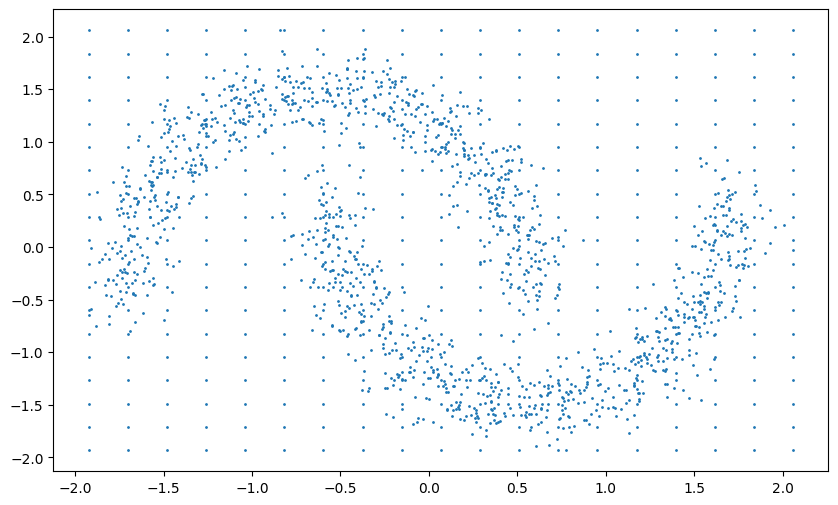

In [22]:
points = LAM.reference

# plot
fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(points[:, 0], points[:, 1], s=1)

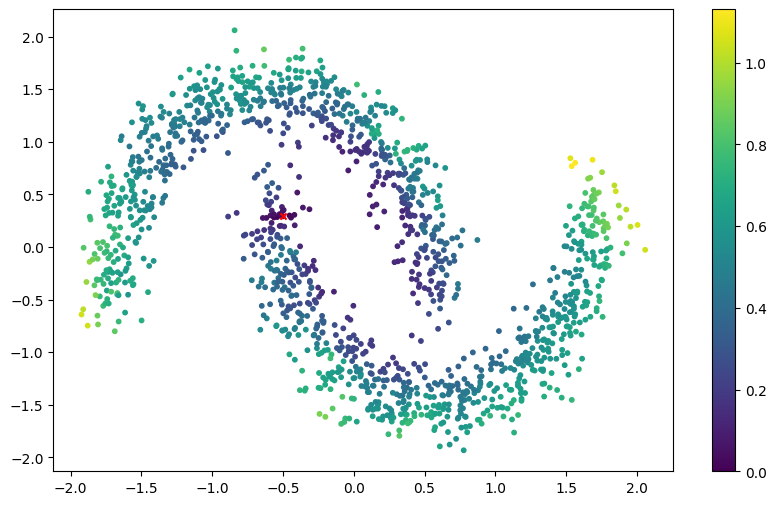

In [23]:
# calculate the distance to all points from the point 0 and plot

dist = LAM.distance(0)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

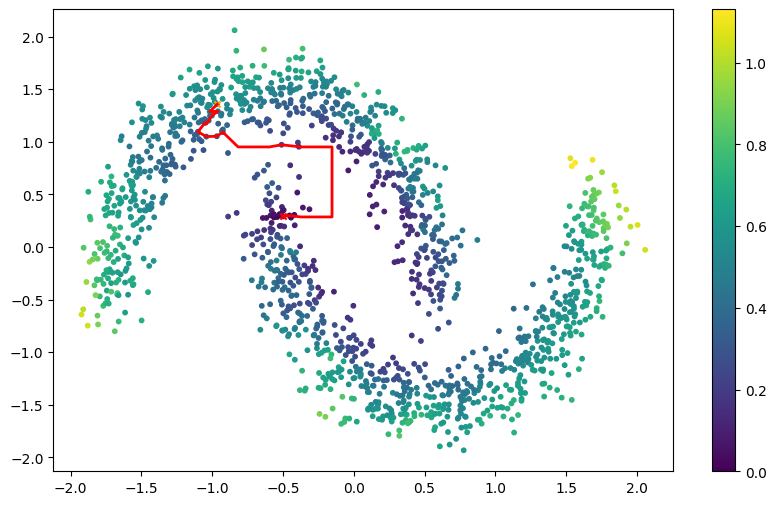

In [24]:
start_point = 0
end_point = p

_, path = LAM.distance(start_point, end_point, return_path=True)

fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
# plot the path, consider that the entries in path are points
ax.plot(path[:,0], path[:,1], c='r', linewidth=2)
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
ax.scatter(X[p, 0], X[p, 1], c='orange', s=20, marker='x')
plt.colorbar(plot)
plt.show()

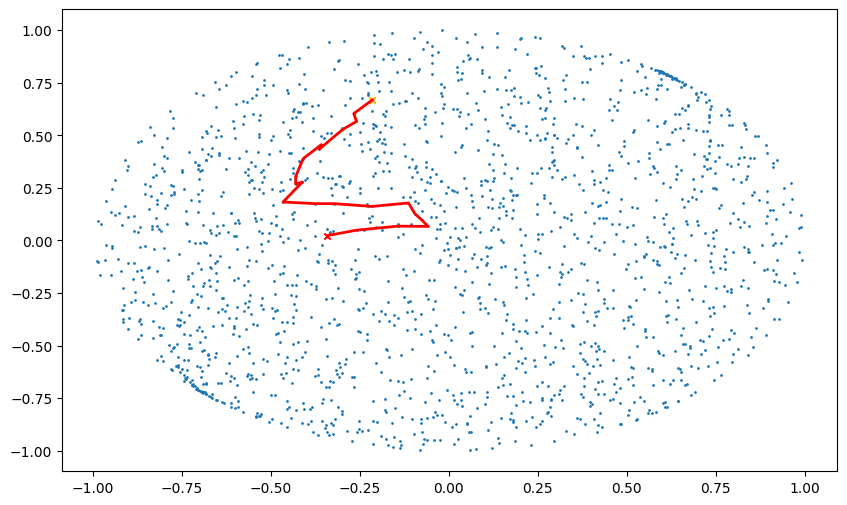

In [28]:
# plot pushed reference
fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(LAM.reference_pushed[:, 0], LAM.reference_pushed[:, 1], s=1)

# plot the path

path = LAM.flow.transform(path)
ax.plot(path[:, 0], path[:, 1], c='r', linewidth=2)
ax.scatter(LAM.data_pushed[0, 0], LAM.data_pushed[0, 1], c='r', s=20, marker='x')
ax.scatter(LAM.data_pushed[p, 0], LAM.data_pushed[p, 1], c='orange', s=20, marker='x')

